## Fuzzy Clustering

**Fuzzy clustering allows each data point to belong to multiple clusters with different membership values. Instead of assigning a point to just one group, it captures how strongly a point relates to each cluster.**

- Uses membership scores between 0 and 1
- Handles overlapping or unclear cluster boundaries
- More flexible than hard clustering methods
- Useful when data points don’t fit neatly into a single group

## Implementation of Fuzzy Clustering

In [2]:
pip install scikit-fuzzy

   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/920.8 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 5.0 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


### Step 1: Importing Libraries

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

###  Step 2: Generating Sample Data

In [4]:
np.random.seed(0)
center = 0.5
spread = 0.1

data = center + spread * np.random.randn(2, 100)

data = np.clip(data, 0, 1)

### Step 3: Setting Fuzzy C-Means Parameters

**Parameters control clustering behavior: number of clusters, fuzziness degree, stop tolerance and max iterations for convergence.**

- n_clusters = 3: We want to divide data into 3 clusters.
- m = 1.7: The fuzziness parameter; higher values make cluster memberships softer (points can belong to multiple clusters).
- error = 1e-5: The stopping tolerance; algorithm stops if changes are smaller than this threshold.
- maxiter = 2000: The maximum number of iterations allowed to reach convergence.

In [5]:
n_clusters = 3
m = 1.7
error = 1e-5
maxiter = 2000

### Step 4: Performing Fuzzy C-Means Clustering and Assign Each Point to a Hard Cluster

**Converts fuzzy memberships to hard cluster assignments by taking the cluster with highest membership for each point.**

- cntr: Final cluster centers
- u: Membership matrix indicating degree of belonging for each point to each cluster
- fpc: Fuzzy partition coefficient (quality metric)
- This runs the clustering algorithm on the data.

In [6]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None
)

hard_clusters = np.argmax(u, axis=0)

### Step 5: Printing Cluster Centers and Membership Matrix

In [7]:
print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):")
print(u[:, :5])

Cluster Centers:
 [[0.40427944 0.44688713]
 [0.57608357 0.43108734]
 [0.53151692 0.61555506]]

Fuzzy Membership Matrix (first 5 data points):
[[0.0753945  0.103008   0.03041289 0.09668828 0.07004986]
 [0.16579475 0.86917327 0.95209853 0.36321813 0.85265308]
 [0.75881075 0.02781873 0.01748858 0.54009359 0.07729706]]


### Step 6: Visualizing Fuzzy Memberships and Hard Clusters

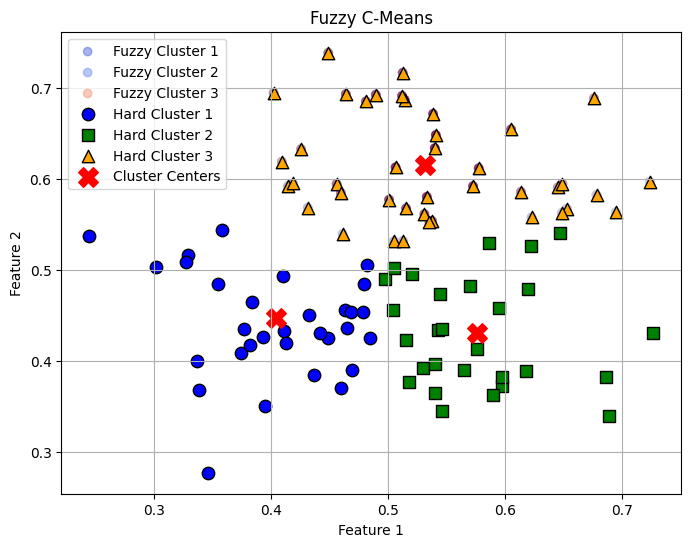

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(data[0], data[1], c=u[i], cmap='coolwarm',
               alpha=0.5, label=f'Fuzzy Cluster {i+1}')

markers = ['o', 's', '^']
colors = ['blue', 'green', 'orange']
for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(cluster_points[0], cluster_points[1], c=colors[i],
               marker=markers[i], edgecolor='k', s=80, label=f'Hard Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red',
           marker='X', s=200, label='Cluster Centers')

ax.set_title('Fuzzy C-Means')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
plt.grid(True)
plt.show()

**Applications**
- Image Segmentation: Handles noise and overlapping regions efficiently.
- Pattern Recognition: Identifies ambiguous patterns in speech, handwriting, etc.
- Customer Segmentation: Groups customers with partial membership for flexible marketing.
- Medical Diagnosis: Analyzes patient or genetic data with uncertain boundaries.
- Bioinformatics: Captures multifunctional gene roles by assigning genes to multiple clusters.

## The End !